# Machine Learning With SVM

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../diabetes_preprocessed.csv')



In [5]:
# Features (X) and label (y) separation
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [6]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 599
Testing set size: 150


In [7]:
#Scaling and Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['Age_Group'] = label_encoder.fit_transform(X_train['Age_Group'])
X_test['Age_Group'] = label_encoder.transform(X_test['Age_Group'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Create and train the SVM model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_scaled, y_train)

# Evaluate the SVM model
y_pred_svm = model_svm.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy Score: 0.7466666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        99
           1       0.70      0.45      0.55        51

    accuracy                           0.75       150
   macro avg       0.73      0.67      0.69       150
weighted avg       0.74      0.75      0.73       150



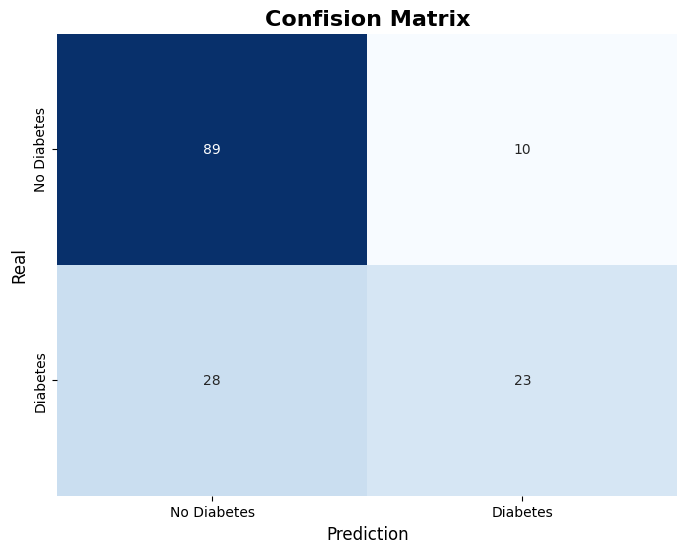

In [12]:
# Confusion Matrix Visualization
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confision Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

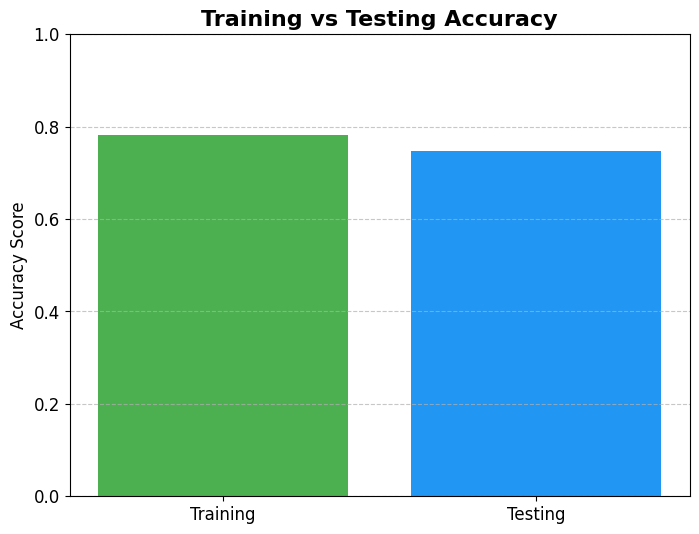

In [13]:
# Training and Test Accuracy Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [accuracy_score(y_train, model_svm.predict(X_train_scaled)), accuracy_score(y_test, y_pred_svm)], color=['#4CAF50', '#2196F3'])
plt.title('Training vs Testing Accuracy', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

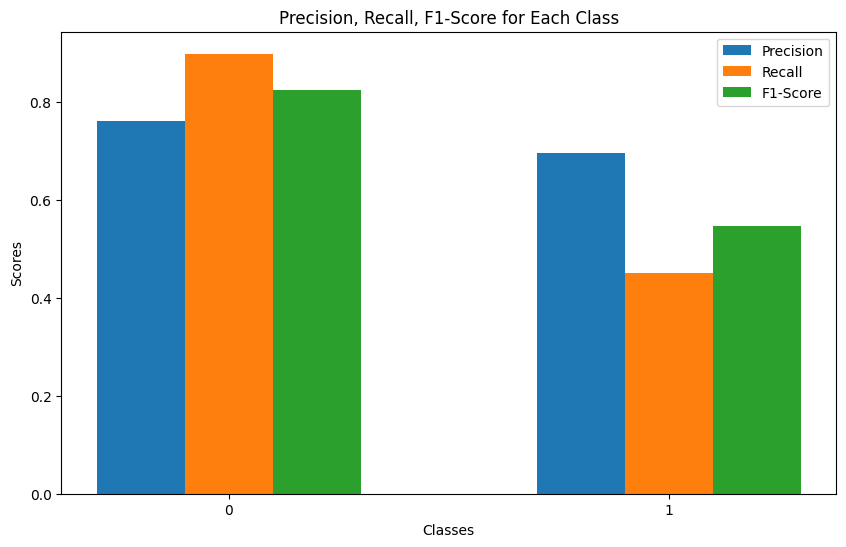

In [14]:
# Precision, Recall, F1-Score Bar Plots
report = classification_report(y_test, y_pred_svm, output_dict=True)

classes = list(report.keys())[:-3]  
metrics = ["precision", "recall", "f1-score"]

# Organize data for plotting
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

# Plotting
x = np.arange(len(classes))  # Class indices
width = 0.2  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
plt.bar(x, values["recall"], width, label="Recall")
plt.bar(x + width, values["f1-score"], width, label="F1-Score")

# Customize the plot
plt.xticks(x, classes)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend()
plt.show()


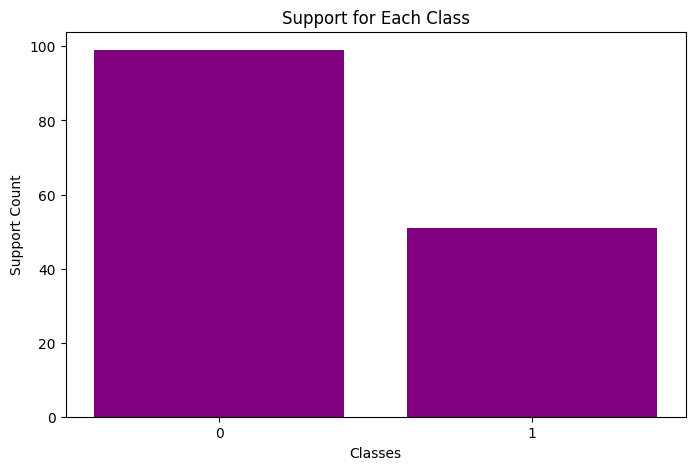

In [15]:
# Support Visualization
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple')
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()

In [16]:
import joblib

# Savng the model
joblib.dump(model_svm, 'diabetes_model_svm.pkl')

# Load the model
loaded_model = joblib.load('diabetes_model_svm.pkl')

# Predict with the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Compare results
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded))

Accuracy: 0.7467
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        99
           1       0.70      0.45      0.55        51

    accuracy                           0.75       150
   macro avg       0.73      0.67      0.69       150
weighted avg       0.74      0.75      0.73       150

